[link para GitHub](https://github.com/brenomferreira/Curso_Data_Science_analises_para_saude_e_medicina/blob/main/Principal.ipynb)



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings_possibilidades = ["default", "error", "ignore", "always", "module", "once"]
warnings.filterwarnings(action=warnings_possibilidades[2])

In [2]:
casos_confirmado = pd.read_csv(
    "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
)
mortes = pd.read_csv(
    "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
)
recuperados = pd.read_csv(
    "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
)

In [3]:
casos_confirmado.set_index("Country/Region", inplace=True)
mortes.set_index("Country/Region", inplace=True)
recuperados.set_index("Country/Region", inplace=True)
display(casos_confirmado.head(3))
display(mortes.head(3))
display(recuperados.head(3))

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496


,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881


,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
casos_confirmado_agrupados_por_paises = casos_confirmado.groupby("Country/Region").sum()
mortes_agrupados_por_paises = mortes.groupby("Country/Region").sum()
recuperados_agrupados_por_paises = recuperados.groupby("Country/Region").sum()

In [5]:
filtro = "Brazil"
casos_confirmados_filtrado = casos_confirmado_agrupados_por_paises.loc[filtro][
    3:
].to_frame()
casos_fatais_filtrado = mortes_agrupados_por_paises.loc[filtro][3:].to_frame()
recuperados_filtrado = recuperados_agrupados_por_paises.loc[filtro].to_frame()

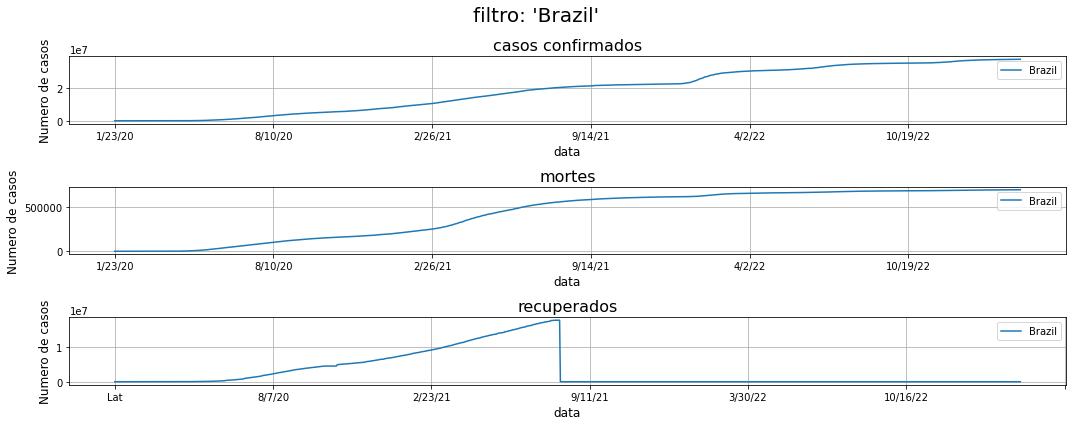

In [6]:
fig, ax = plt.subplots(3, figsize=(15, 6))
fig.suptitle(f"filtro: '{filtro}'", fontsize=20)
casos_confirmados_filtrado.plot(ax=ax[0])
ax[0].set_title("casos confirmados", fontsize=16)
ax[1].set_title("mortes", fontsize=16)
ax[2].set_title("recuperados", fontsize=16)


casos_fatais_filtrado.plot(ax=ax[1])
recuperados_filtrado.plot(ax=ax[2])
for axAtual in ax:
    axAtual.set_xlabel("data", fontsize=12)
    axAtual.set_ylabel("Numero de casos", fontsize=12)
    axAtual.grid(True)
fig.tight_layout()

In [ ]:
mortes_por_dia = casos_fatais_filtrado.diff().dropna()
mortes_por_dia.columns = ['mortes por dia']
mortes_por_dia.describe().round(0)


In [95]:
mortes_por_dia.query(f'`mortes por dia` == {int(max(mortes_por_dia.values))} ').index

Index(['4/8/21'], dtype='object')


>Por algum motivo desconhecido, tem valores negativos para numero de mortes

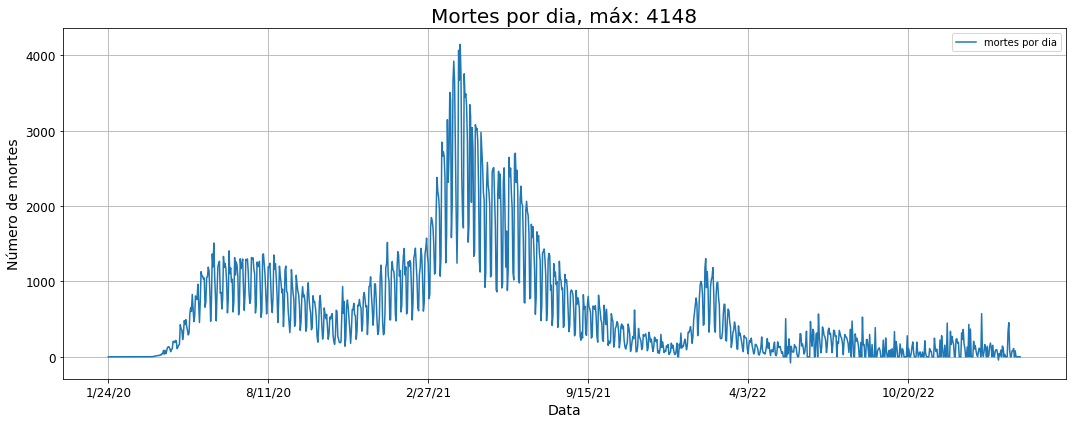

In [91]:
mortes_por_dia.index,mortes_por_dia.plot(figsize = (15,6))
plt.title(f'Mortes por dia, máx: {int(max(mortes_por_dia.values))}', fontsize=20)
plt.ylabel('Número de mortes', fontsize=14)
plt.xlabel('Data', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.grid(True)


In [8]:
resumo_mortes = mortes_agrupados_por_paises.iloc[:, -1].to_frame()
resumo_mortes.rename(index={"Brazil": "Mortes por Covid"}, inplace=True)

resumo_casos_confirmados = casos_confirmado_agrupados_por_paises.iloc[:, -1].to_frame()
resumo_casos_confirmados.rename(index={"Brazil": "Casos Confirmados"}, inplace=True)

In [9]:
resumo = pd.concat([resumo_casos_confirmados, resumo_mortes], axis=1)
resumo.columns = ["Casos Confirmados", "Mortes"]
resumo.rename_axis("Países", inplace=True)
resumo.rename_axis(columns="Resumo COVID", inplace=True)
display(resumo)

Resumo COVID,Casos Confirmados,Mortes
Países,,
Afghanistan,209451.0,7896.0
Albania,334457.0,3598.0
Algeria,271496.0,6881.0
Andorra,47890.0,165.0
Angola,105288.0,1933.0
...,...,...
Winter Olympics 2022,535.0,0.0
Yemen,11945.0,2159.0
Zambia,343135.0,4057.0


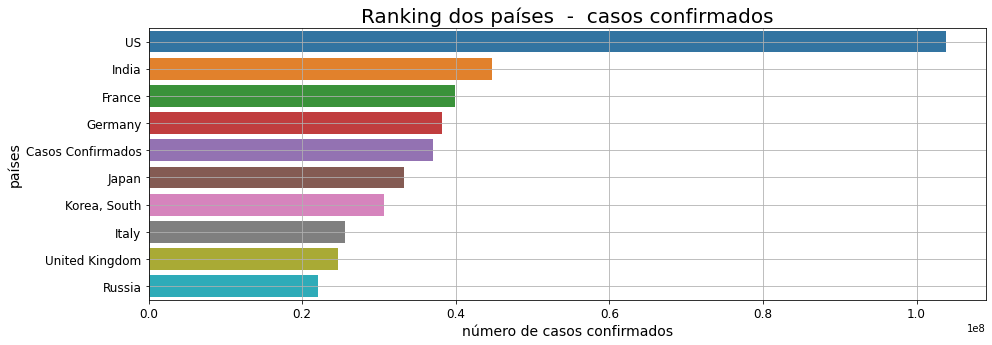

In [10]:
df = resumo["Casos Confirmados"].sort_values(ascending=False).iloc[0:10].to_frame()
ax = sns.barplot(data=df, x="Casos Confirmados", y=df.index)
ax.figure.set_size_inches(15, 5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.set_title("Ranking dos países  -  casos confirmados", fontsize=20)
ax.set_xlabel("número de casos confirmados", fontsize=14)
ax.set_ylabel("países", fontsize=14)
ax.grid(True)

## estimativa letalidade 

In [11]:
letalidade = resumo["Mortes"] / resumo["Casos Confirmados"] * 100
resumo["letalidade"] = letalidade
resumo.to_csv("temp.csv")
resumo

Resumo COVID,Casos Confirmados,Mortes,letalidade
Países,,,
Afghanistan,209451.0,7896.0,3.769855
Albania,334457.0,3598.0,1.075774
Algeria,271496.0,6881.0,2.534476
Andorra,47890.0,165.0,0.344540
Angola,105288.0,1933.0,1.835917
...,...,...,...
Winter Olympics 2022,535.0,0.0,0.000000
Yemen,11945.0,2159.0,18.074508
Zambia,343135.0,4057.0,1.182333


In [12]:
resumo.query("`Casos Confirmados` > 1000")

Resumo COVID,Casos Confirmados,Mortes,letalidade
Países,,,
Afghanistan,209451.0,7896.0,3.769855
Albania,334457.0,3598.0,1.075774
Algeria,271496.0,6881.0,2.534476
Andorra,47890.0,165.0,0.344540
Angola,105288.0,1933.0,1.835917
...,...,...,...
Vietnam,11526994.0,43186.0,0.374651
West Bank and Gaza,703228.0,5708.0,0.811686
Yemen,11945.0,2159.0,18.074508


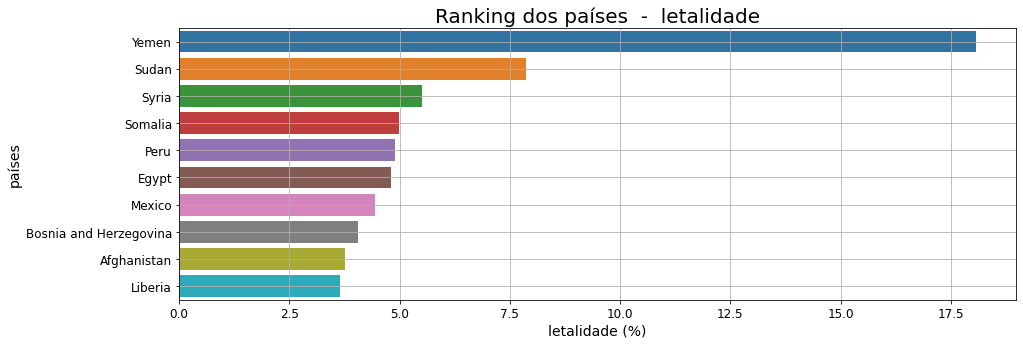

In [13]:
df = (
    resumo.query("`Casos Confirmados` > 1000")["letalidade"]
    .sort_values(ascending=False)
    .iloc[0:10]
    .to_frame()
)
ax = sns.barplot(data=df, x="letalidade", y=df.index)
ax.figure.set_size_inches(15, 5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.set_title("Ranking dos países  -  letalidade", fontsize=20)
ax.set_xlabel("letalidade (%)", fontsize=14)
ax.set_ylabel("países", fontsize=14)
ax.grid(True)

<AxesSubplot:xlabel='letalidade'>

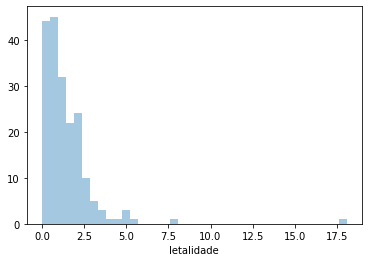

In [14]:
sns.distplot(
    resumo.query("`Casos Confirmados` > 1000")["letalidade"].dropna(), kde=False
)

## E globalmente?

In [15]:
!jupyter nbconvert --to html --no-input Principal.ipynb

[NbConvertApp] Converting notebook Principal.ipynb to html
[NbConvertApp] Writing 720305 bytes to Principal.html
